# EDA

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### Dataset Description

This dataset contains daily gold price data combined with engineered macroeconomic features.  
It includes fields such as returns, moving averages, volatility measures, and macro indicators like interest rates or inflation-related values.

**Target Variable:**  
`Target` — a binary label where:
- **1 = Gold price goes up the next 10 days**
- **0 = Gold price goes down**

**Source:**  
The source file `gold_macro_features.csv` is stored locally, but the data originates from publicly available financial APIs (Yahoo Finance + macroeconomic sources).  
The README will include instructions on how to download or recreate this dataset instead of uploading it to GitHub.

### Loading the dataset (from local system)

In [3]:
df = pd.read_csv("/Users/willschreyer/Desktop/Github/MachineLearningClass/gold_macro_features.csv")
df.head()

,Date,Open,High,Low,Close,Volume,DollarIndex,US10Y,Oil,SP500,...,Gold_to_Yield,Gold_to_SPX,Lag1,Lag5,Vol_5,RSI_Change,DollarLag,YieldLag,Future_Return_10d,Target
0,2001-06-18,272.000000,272.500000,271.299988,272.399994,31,118.550003,5.241,27.549999,1208.430054,...,51.974801,0.225416,-0.015005,0.003332,0.011359,6.379094,0.002540,0.013,-0.011074,0
1,2001-06-19,273.000000,273.399994,273.000000,273.399994,21,119.379997,5.228,27.480000,1212.579956,...,52.295320,0.225470,0.004415,0.001395,0.009964,14.392540,0.002280,0.013,-0.021443,0
2,2001-06-20,272.700012,272.700012,271.000000,272.399994,26,119.440002,5.199,26.500000,1223.140015,...,52.394681,0.222705,0.003664,0.000294,0.010204,-1.198816,0.006977,-0.013,-0.027164,0
3,2001-06-21,271.799988,272.600006,271.799988,272.600006,12,119.180000,5.178,26.559999,1237.040039,...,52.645800,0.220365,-0.003664,-0.001971,0.007947,-1.144477,0.000503,-0.029,-0.024885,0
4,2001-06-22,273.600006,273.600006,272.000000,272.299988,0,119.230003,5.124,26.830000,1225.349976,...,53.142063,0.222222,0.000734,0.000810,0.003347,2.473830,-0.002179,-0.021,-0.021530,0


### Loading the dataset (from yfinance)

In [2]:
import yfinance as yf

macro_raw = yf.download(["DX=F", "^TNX", "CL=F", "^GSPC", "^VIX"],
                        start="2000-08-30", end="2025-01-01", interval="1d")
macro = pd.DataFrame({
    "DollarIndex": macro_raw["Close"]["DX=F"],
    "US10Y": macro_raw["Close"]["^TNX"],
    "Oil": macro_raw["Close"]["CL=F"],
    "SP500": macro_raw["Close"]["^GSPC"],
    "VIX": macro_raw["Close"]["^VIX"]
}).dropna()

# Define gold dataset
gold = yf.download("GC=F", start="2000-08-30", end="2025-01-01", interval="1d")[["Open", "High", "Low", "Close", "Volume"]]
gold.columns = [col[0] if isinstance(col, tuple) else col for col in gold.columns]
gold.index.name = "Date"
gold = gold.sort_index()

# Merge with gold dataset
df = gold.merge(macro, left_index=True, right_index=True, how="inner").dropna()
print("Merged shape (Gold + Macro):", df.shape)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 5 completed

5 Failed downloads:
['^GSPC', 'CL=F', '^VIX', 'DX=F', '^TNX']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GC=F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Merged shape (Gold + Macro): (0, 10)


### Overview of the data

In [4]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5885 entries, 0 to 5884
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               5885 non-null   object 
 1   Open               5885 non-null   float64
 2   High               5885 non-null   float64
 3   Low                5885 non-null   float64
 4   Close              5885 non-null   float64
 5   Volume             5885 non-null   int64  
 6   DollarIndex        5885 non-null   float64
 7   US10Y              5885 non-null   float64
 8   Oil                5885 non-null   float64
 9   SP500              5885 non-null   float64
 10  VIX                5885 non-null   float64
 11  LogReturn          5885 non-null   float64
 12  Volatility         5885 non-null   float64
 13  MA20               5885 non-null   float64
 14  MA200              5885 non-null   float64
 15  Momentum_10        5885 non-null   float64
 16  Momentum_50        5885 

,count,mean,std,min,25%,50%,75%,max
Open,5885.0,1189.694223,563.578303,264.799988,666.700012,1245.099976,1637.500000,2787.399902
High,5885.0,1195.626848,566.595000,265.100006,670.000000,1251.000000,1647.000000,2789.000000
Low,5885.0,1183.494393,560.507644,263.700012,665.700012,1240.000000,1626.699951,2774.600098
Close,5885.0,1189.629753,563.587591,264.600006,667.400024,1245.400024,1637.500000,2788.500000
Volume,5885.0,4415.256245,24749.424242,0.000000,24.000000,112.000000,412.000000,386334.000000
DollarIndex,5885.0,91.386765,10.586849,71.304001,82.059998,91.510002,98.190002,121.209999
US10Y,5885.0,3.113738,1.176081,0.499000,2.144000,3.029000,4.148000,5.428000
Oil,5885.0,65.847630,24.662447,-37.630001,47.349998,65.400002,83.820000,145.289993
SP500,5885.0,2154.915363,1259.771588,676.530029,1191.369995,1562.469971,2815.620117,6090.270020
VIX,5885.0,19.639903,8.631898,9.140000,13.670000,17.330000,22.809999,82.690002


### Missing Values Check

Before continuing, we inspect whether the dataset contains missing values.  
This ensures that any gaps are identified early and handled properly.


In [4]:
df.isna().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
DollarIndex          0
US10Y                0
Oil                  0
SP500                0
VIX                  0
LogReturn            0
Volatility           0
MA20                 0
MA200                0
Momentum_10          0
Momentum_50          0
ROC_4w               0
DollarReturn         0
YieldChange          0
RSI                  0
Gold_to_Dollar       0
Gold_to_Yield        0
Gold_to_SPX          0
Lag1                 0
Lag5                 0
Vol_5                0
RSI_Change           0
DollarLag            0
YieldLag             0
Future_Return_10d    0
Target               0
dtype: int64

The dataset contains no missing values (all columns show a sum of 0).  
Therefore, no imputation or removal of rows was required.

### Feature Engineering

In [5]:
# Feature Engineering
df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))
df["Volatility"] = df["LogReturn"].rolling(20).std()
df["MA20"] = df["Close"].rolling(20).mean()
df["MA200"] = df["Close"].rolling(200).mean()
df["Momentum_10"] = df["Close"] / df["MA20"] - 1
df["Momentum_50"] = df["Close"] / df["MA200"] - 1
df["ROC_4w"] = df["Close"].pct_change(20)
df["DollarReturn"] = np.log(df["DollarIndex"] / df["DollarIndex"].shift(1))
df["YieldChange"] = df["US10Y"].diff()

# RSIa
def calc_rsi(series, window=14):
    delta = series.diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    gain = up.rolling(window).mean()
    loss = down.rolling(window).mean()
    rs = gain / (loss + 1e-9)
    return 100 - (100 / (1 + rs))

df["RSI"] = calc_rsi(df["Close"])

#  New Relative Features
df["Gold_to_Dollar"] = df["Close"] / df["DollarIndex"]
df["Gold_to_Yield"] = df["Close"] / (df["US10Y"] + 1e-6)
df["Gold_to_SPX"] = df["Close"] / df["SP500"]

#  Lag and Trend Features
df["Lag1"] = df["LogReturn"].shift(1)
df["Lag5"] = df["LogReturn"].rolling(5).mean()
df["Vol_5"] = df["LogReturn"].rolling(5).std()
df["RSI_Change"] = df["RSI"].diff()
df["DollarLag"] = df["DollarReturn"].shift(1)
df["YieldLag"] = df["YieldChange"].shift(1)

#  Target: 10-Day Future Direction
df["Future_Return_10d"] = np.log(df["Close"].shift(-10) / df["Close"])
df["Target"] = (df["Future_Return_10d"] > 0).astype(int)
df = df.dropna()

df.to_csv(r"C:\Users\willschreyer\Desktop\gold_macro_features.csv")

### Target Distribution

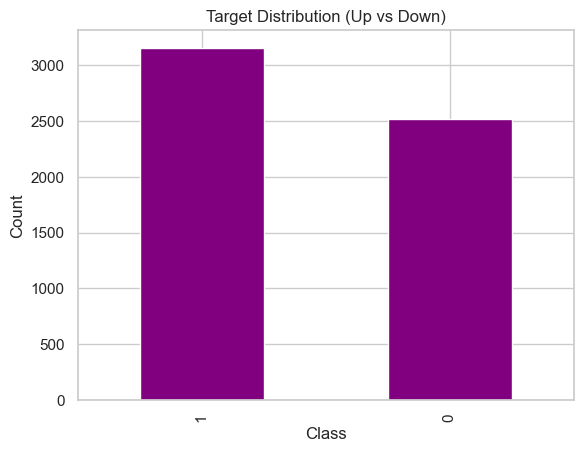

In [6]:
df['Target'].value_counts().plot(kind='bar', color='purple')
plt.title("Target Distribution (Up vs Down)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### Interpretation — Target Distribution

The target variable shows a mild class imbalance: “Up” days occur more frequently than “Down” days.  
This pattern is common in long-term financial time series because gold exhibits upward drift over multi-decade horizons.  
Although the imbalance is not extreme, it still means that accuracy alone would be misleading, so we will rely on metrics like F1-score, ROC-AUC, and PR-AUC for model evaluation.


### Feature Distributions

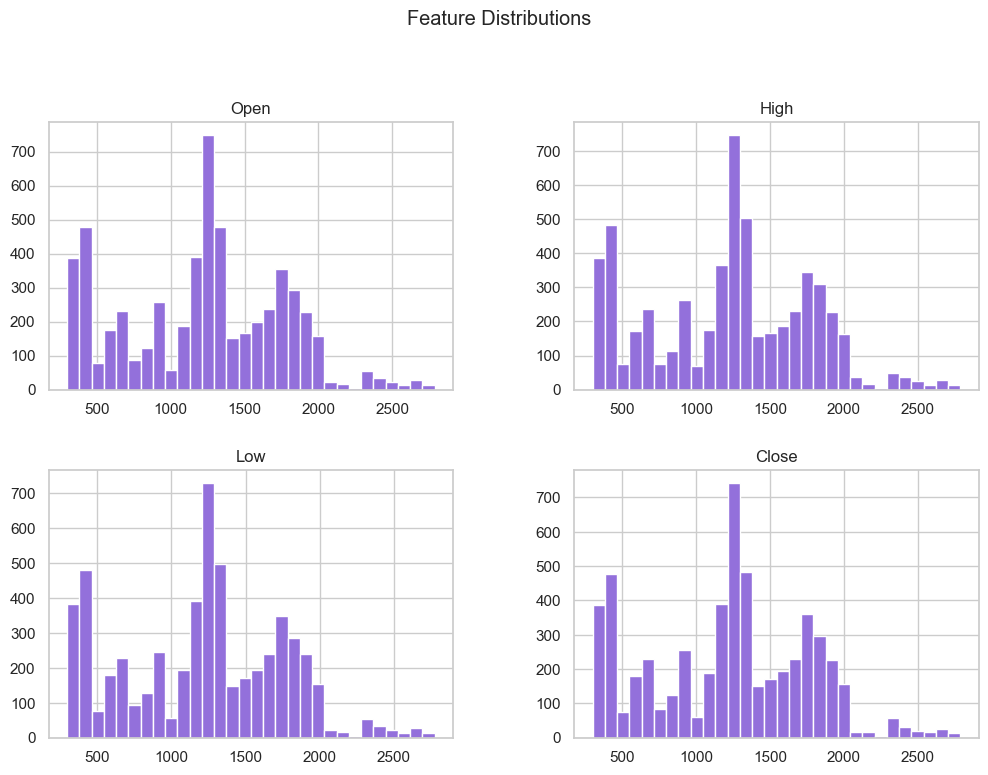

In [7]:
numeric_cols = df.select_dtypes(include=np.number).columns[:4]

df[numeric_cols].hist(bins=30, figsize=(12, 8), color='mediumpurple')
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

### Interpretation — Feature Distributions

The price-based features (Open, High, Low, Close) display a wide range and noticeable skewness, reflecting long-term inflation-adjusted growth in gold prices over the 2002–2024 period.  
We also see multiple clusters and long right tails, which likely correspond to major macroeconomic cycles (e.g., 2008 crisis, 2011 gold peak, 2020 pandemic spike).  
Because financial data can exhibit sharp jumps, applying clipping or transformations later in modeling helps reduce the influence of extreme values.


### Correlation Map

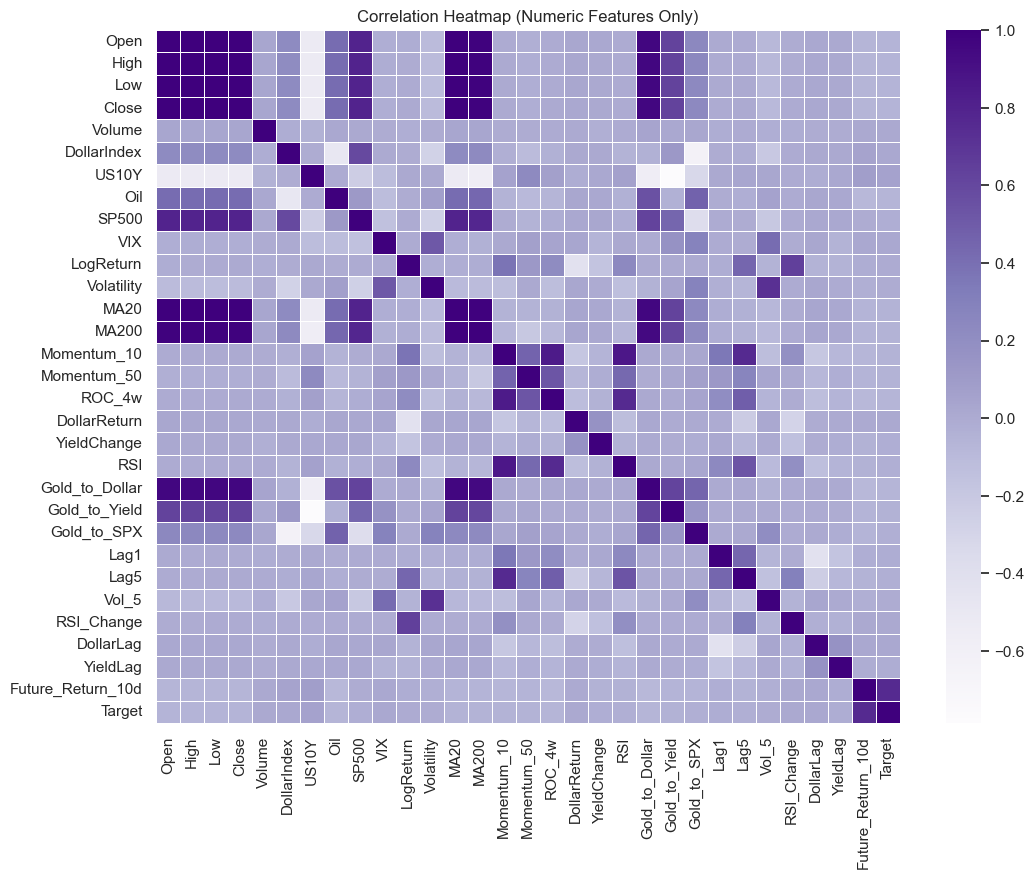

In [8]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 9))
sns.heatmap(numeric_df.corr(), cmap="Purples", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


### Interpretation — Correlation Map

The correlation map shows strong relationships among the OHLC price features (Open, High, Low, Close), which is expected because they derive from the same daily price action.  
Indicators like MA20, MA200, LogReturn, and various momentum metrics form another correlated cluster, reflecting shared trend-following behavior.  
Features such as VIX, SP500, 10Y yields, and Dollar Index show weaker but noticeable correlations with gold, consistent with known macro relationships (e.g., gold vs. interest rates or equity volatility).  
Overall, the heatmap reveals clear structure: tightly correlated technical indicators and moderately correlated macro features. LightGBM handles such feature redundancy well, but this pattern suggests that feature importance and SHAP values will be useful to interpret the model later.

### Save a figure to the results folder

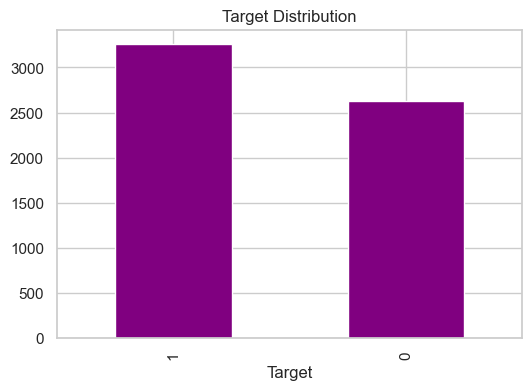

In [5]:
plt.figure(figsize=(6,4))
df['Target'].value_counts().plot(kind='bar', color='purple')
plt.title("Target Distribution")
plt.savefig("../results/target_distribution.png", bbox_inches="tight")
plt.show()


### Save the dataframe for use in 02_modeling_basline.ipynb

In [6]:
df.to_csv("../gold_macro_features.csv", index=False)